In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as pyplot
%matplotlib inline

In [19]:
import pandas


In [20]:
import os
print(os.listdir("."))

['.ipynb_checkpoints', 'boston-housing-numpy.ipynb', 'Untitled.ipynb', 'weather_madrid_LEMD_1997_2015.csv']


In [21]:
dataframe=pandas.read_csv('./weather_madrid_LEMD_1997_2015.csv')

In [22]:
dataframe.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [23]:
data=np.array(dataframe)

In [24]:
data[:2]

array([['1997-1-1', 7.0, 4.0, 2.0, 5.0, 3.0, 2.0, 100.0, 95.0, 76.0,
        1010, 1008, 1004, 10.0, 9.0, 4.0, 13, 6, nan, 0.0, 6.0, nan, 229],
       ['1997-1-2', 7.0, 3.0, 0.0, 6.0, 3.0, 0.0, 100.0, 92.0, 71.0,
        1007, 1003, 997, 10.0, 9.0, 4.0, 26, 8, 47.0, 0.0, 5.0, 'Rain',
        143]], dtype=object)

In [25]:
months=[x.split("-")[1] for x in data[:,0]]

In [26]:
months=np.array(months,dtype=int)

In [27]:
months


array([ 1,  1,  1, ..., 12, 12, 12])

In [28]:
temperatures=data[:,2].astype(float)

In [29]:
temperatures

array([ 4.,  3.,  3., ...,  8.,  8., 10.])

In [30]:
np.mean(temperatures[months==i]) for i in range(1,13)


SyntaxError: invalid syntax (<ipython-input-30-110214fc1b8c>, line 1)

In [31]:
mean_temp=[np.nanmean(temperatures[months==i])for i in range(1,13)]

In [32]:
mean_temp

[5.688729874776387,
 6.947069943289225,
 10.14874551971326,
 12.85925925925926,
 16.667235494880547,
 22.116071428571427,
 25.074702886247877,
 24.7859649122807,
 20.49473684210526,
 15.152801358234296,
 9.196491228070176,
 5.859083191850594]

In [33]:
pyplot.mean_temp

AttributeError: module 'matplotlib.pyplot' has no attribute 'mean_temp'

In [34]:
names="Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec".split(',')

([<matplotlib.axis.XTick at 0x7fb4d1305898>,
 <a list of 12 Text xticklabel objects>)

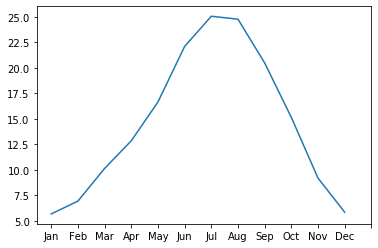

In [35]:
pyplot.plot(mean_temp)
pyplot.xticks(list(range(13)),names)

In [36]:
hi_month=np.argmax(mean_temp)

In [37]:
hi_month

6

In [38]:
mean_temp

[5.688729874776387,
 6.947069943289225,
 10.14874551971326,
 12.85925925925926,
 16.667235494880547,
 22.116071428571427,
 25.074702886247877,
 24.7859649122807,
 20.49473684210526,
 15.152801358234296,
 9.196491228070176,
 5.859083191850594]

In [39]:
print("The month with highest mean temperature is: %s" % names[hi_month])

The month with highest mean temperature is: Jul


In [40]:
names


['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [41]:
years=[x.split('-')[0] for x in data[:,0]]

In [42]:
years=np.array(years,dtype=int)

In [43]:
years

array([1997, 1997, 1997, ..., 2015, 2015, 2015])

In [44]:
np.nanmean(temperatures[np.logical_and(months==1,years==1997)])

6.967741935483871

In [45]:
year_mean=[np.nanmean(temperatures[years==y]) for y in range(1997,2016)]

In [46]:
YEARS=list(set(years))

In [47]:
YEARS


[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [48]:
year_mean

[15.610958904109589,
 14.556164383561644,
 14.252054794520548,
 14.055970149253731,
 13.606060606060606,
 14.169863013698631,
 14.652054794520549,
 14.744047619047619,
 14.465753424657533,
 15.027397260273972,
 13.515068493150684,
 14.073770491803279,
 15.115068493150686,
 14.38082191780822,
 15.454794520547946,
 14.527322404371585,
 14.53972602739726,
 15.808219178082192,
 15.802739726027397]

In [49]:
years.range()


AttributeError: 'numpy.ndarray' object has no attribute 'range'

In [57]:

month_year=np.array([np.nanmean(temperatures[np.logical_and(months==m,years==y)])for y in range(1997,2016) for m in range(1,13)])

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [51]:
only_Jan=[np.nanmean(temperatures[np.logical_and(months==1,years==y)])for y in range(1997,2016)]

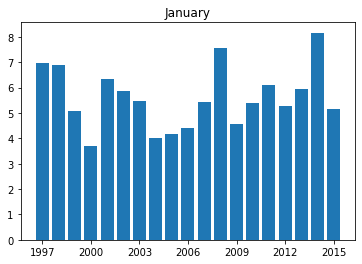

In [56]:
pyplot.bar(YEARS,only_Jan);
pyplot.xticks(YEARS[::3]);
pyplot.title('January');

In [53]:
def mean_of_month_year(month, year):
    return np.nanmean(temperatures[np.logical_and(months==month,years==year)])


In [ ]:
mean_of_month_year(,1997)

In [ ]:
distinct_years=np.unique(years)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


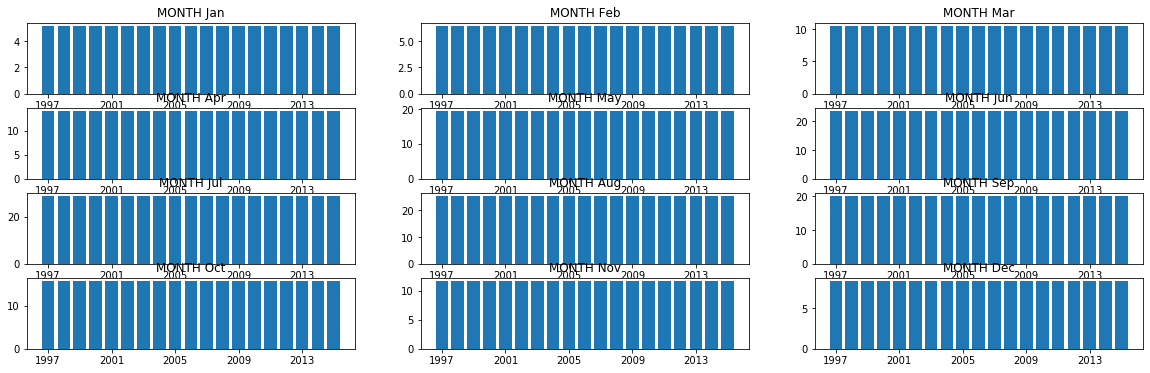

In [95]:
pyplot.subplots(4,3, figsize=(20,6));
for i in range(1,13):
    for j in range(1997,2016):
        monthly_temperature=np.array([mean_of_month_year(i,j)])
    pyplot.subplot(4,3,i);
    pyplot.bar(YEARS,monthly_temperature);
    pyplot.xticks(YEARS[::4]);
    pyplot.title("MONTH %s"% names[i-1])


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


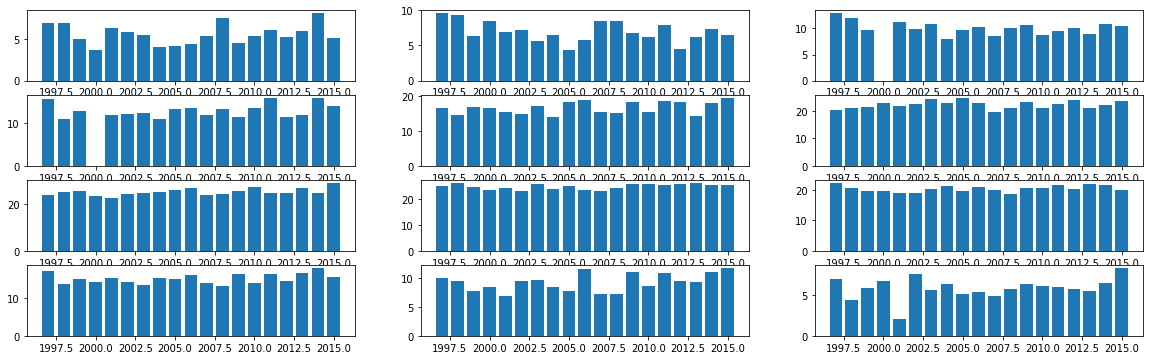

In [75]:
pyplot.subplots(4,3, figsize=(20,6));
for i in range(4):
    for j in range(3):
        m = 3*i + j + 1
        monthly_temperatures = np.array([mean_of_month_year(m,y) for y in YEARS])
        pyplot.subplot(4, 3, m);
        pyplot.bar(YEARS, monthly_temperatures)

In [87]:
for i in range(4):
    for j in range(3):
        m = 3*i + j + 1
        print(m)

1
2
3
4
5
6
7
8
9
10
11
12
